<a href="https://colab.research.google.com/github/souvik25162/ArimaAnnHybrid/blob/master/ARIMA_LSTM%20germany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 2.7MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
pip install pymc3 --upgrade

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler,StandardScaler
plt.style.use('fivethirtyeight')

In [6]:
from google.colab import files
uploaded=files.upload()
df=pd.read_excel('germany.xlsx')
##df.rename(columns={'LMUNRRTTCHM156S':'values'},inplace=True)
df.head()

Saving germany.xlsx to germany (2).xlsx


,DATE,values
0,1980-01-01,3.1
1,1980-02-01,3.0
2,1980-03-01,3.1
3,1980-04-01,3.2
4,1980-05-01,3.3


In [ ]:
#df.rename(columns={'japan':'values'},inplace=True)

In [7]:
df['DATE']=pd.to_datetime(df['DATE'])

In [8]:
df.head()

,DATE,values
0,1980-01-01,3.1
1,1980-02-01,3.0
2,1980-03-01,3.1
3,1980-04-01,3.2
4,1980-05-01,3.3


Text(0.5, 0, 'date')

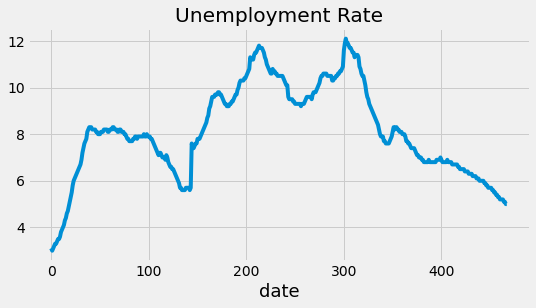

In [9]:
plt.figure(figsize=(8,4))
plt.title("Unemployment Rate")
plt.plot(df['values'])
plt.xlabel('date',fontsize=18)

In [10]:
data=df.filter(['values'])

In [11]:
len(df)

468

In [12]:
dataset=data.values

In [13]:
import math
training_datalen=432
print(training_datalen)

432


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [65]:
train_data= scaled_data[0:432,:]
time_step=30
test_data= scaled_data[training_datalen-time_step:,:]

In [66]:
len(test_data)

66

In [67]:
x_train=[]
y_train=[]
for i in range(time_step,len(train_data)):
  x_train.append(train_data[i-time_step:i,0])
  y_train.append(train_data[i,0])
  if i<=time_step:
    print(x_train)
    print(y_train)
    print()

[array([0.01098901, 0.        , 0.01098901, 0.02197802, 0.03296703,
       0.03296703, 0.04395604, 0.05494505, 0.05494505, 0.06593407,
       0.08791209, 0.0989011 , 0.10989011, 0.12087912, 0.14285714,
       0.15384615, 0.17582418, 0.18681319, 0.20879121, 0.23076923,
       0.25274725, 0.27472527, 0.30769231, 0.32967033, 0.34065934,
       0.35164835, 0.36263736, 0.37362637, 0.38461538, 0.3956044 ])]
[0.40659340659340665]



In [68]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [69]:
x_train.shape

(402, 30)

In [70]:
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [71]:
x_train.shape

(402, 30, 1)

In [72]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [73]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [74]:
model.fit(x_train,y_train,batch_size=1,epochs=30)

Epoch 1/30
402/402 [==============================] - 5s 11ms/step - loss: 0.0074
Epoch 2/30
402/402 [==============================] - 4s 11ms/step - loss: 0.0025
Epoch 3/30
402/402 [==============================] - 4s 10ms/step - loss: 0.0017
Epoch 4/30
402/402 [==============================] - 5s 12ms/step - loss: 0.0010
Epoch 5/30
402/402 [==============================] - 5s 13ms/step - loss: 0.0010
Epoch 6/30
402/402 [==============================] - 5s 13ms/step - loss: 9.3216e-04
Epoch 7/30
402/402 [==============================] - 5s 13ms/step - loss: 7.0232e-04
Epoch 8/30
402/402 [==============================] - 5s 11ms/step - loss: 6.6327e-04
Epoch 9/30
402/402 [==============================] - 4s 10ms/step - loss: 6.2842e-04
Epoch 10/30
402/402 [==============================] - 4s 10ms/step - loss: 6.2592e-04
Epoch 11/30
402/402 [==============================] - 5s 11ms/step - loss: 6.8077e-04
Epoch 12/30
402/402 [==============================] - 5s 13ms/step - lo

In [81]:
x_test=[]
y_test= dataset[training_datalen:,:]
for i in range(time_step,len(test_data)):
  x_test.append(test_data[i-time_step:i,0])

In [82]:
x_test=np.array(x_test)

In [84]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [85]:
pred= model.predict(x_test)
pred1=scaler.inverse_transform(pred)

In [29]:
len(pred1)

36

In [86]:
train= data[:training_datalen]
valid=data[training_datalen:]
valid['pred1']=pred1

No handles with labels found to put in legend.


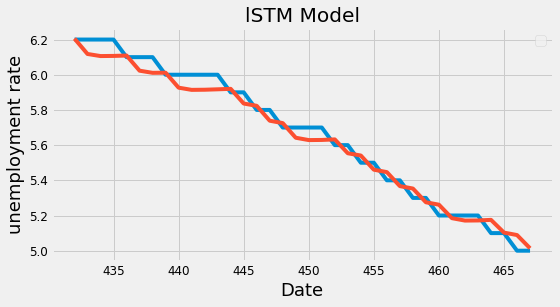

In [87]:
plt.figure(figsize=(8,4))
plt.title("lSTM Model")
plt.xlabel("Date",fontsize=18)
plt.ylabel("unemployment rate",fontsize=18)
plt.plot(valid[['values','pred1']])
plt.legend()
plt.show()

#ARIMA

In [32]:
ts=df['values']
train=ts[0:432]
test= ts[432:len(ts)]

In [33]:
len(test)

36

In [34]:
train=train.values
test=test.values

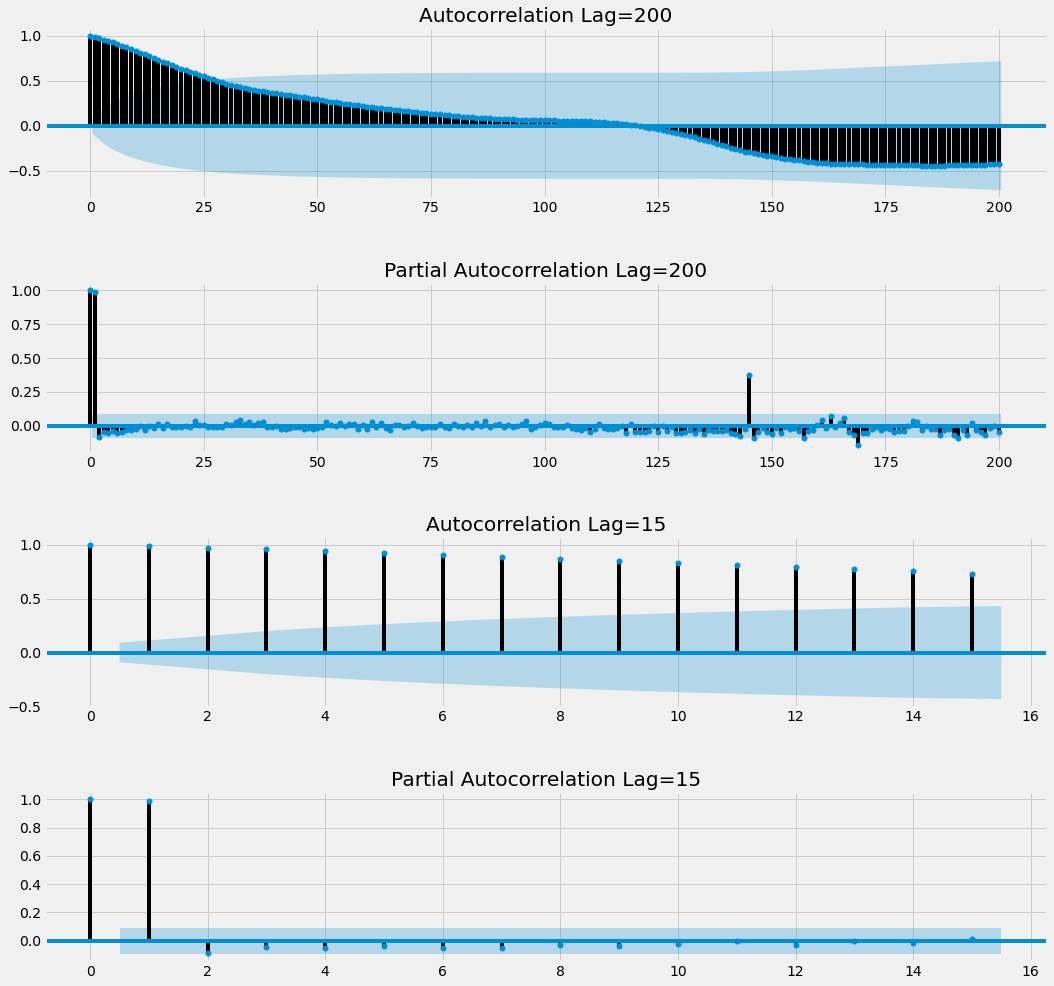

In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(411)
fig = plot_acf(df['values'],lags=200,ax=ax1)
plt.title('Autocorrelation Lag=200')
ax2 = fig.add_subplot(412)
fig = plot_pacf(df['values'],lags=200,ax=ax2)
plt.title('Partial Autocorrelation Lag=200')
ax3 = fig.add_subplot(413)
fig = plot_acf(df['values'],lags=15,ax=ax3)
plt.title('Autocorrelation Lag=15')
ax4 = fig.add_subplot(414)
fig = plot_pacf(df['values'],lags=15,ax=ax4)
plt.title('Partial Autocorrelation Lag=15')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.5)
plt.show()

In [36]:
from statsmodels.tsa.stattools import adfuller,acf,pacf

def test_stationarity(series,mlag =None, lag = None,):
    print('ADF Test Result')
    res = adfuller(series, maxlag = mlag, autolag = lag)
    output = pd.Series(res[0:4],index = ['Test Statistic', 'p value', 'used lag', 'Number of observations used'])
    for key, value in res[4].items():
        output['Critical Value ' + key] = value
    print(output)

In [37]:
test_stationarity(df['values'])

ADF Test Result
Test Statistic                  -1.923819
p value                          0.320940
used lag                        18.000000
Number of observations used    449.000000
Critical Value 1%               -3.444998
Critical Value 5%               -2.867999
Critical Value 10%              -2.570210
dtype: float64


In [38]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [39]:
history=[x for x in train]
predictions=list()

for t in range(len(test)):
  model=ARIMA(history,order=(4,1,1))
  model_fit=model.fit(disp=0)
  output=model_fit.forecast()
  yhat=output[0]
  predictions.append(yhat)
  obs=test[t]
  history.append(obs)
  print('predicted=%f, expected=%f'%(yhat,obs))

predicted=6.290113, expected=6.200000
predicted=6.181387, expected=6.200000
predicted=6.185732, expected=6.200000
predicted=6.187078, expected=6.200000
predicted=6.189862, expected=6.100000
predicted=6.081236, expected=6.100000
predicted=6.085612, expected=6.100000
predicted=6.086979, expected=6.000000
predicted=5.976879, expected=6.000000
predicted=5.982684, expected=6.000000
predicted=5.984854, expected=6.000000
predicted=5.988351, expected=6.000000
predicted=5.993057, expected=5.900000
predicted=5.883357, expected=5.900000
predicted=5.886955, expected=5.800000
predicted=5.774927, expected=5.800000
predicted=5.778766, expected=5.700000
predicted=5.669630, expected=5.700000
predicted=5.674989, expected=5.700000
predicted=5.679898, expected=5.700000
predicted=5.684847, expected=5.600000
predicted=5.577901, expected=5.600000
predicted=5.582973, expected=5.500000
predicted=5.472583, expected=5.500000
predicted=5.476666, expected=5.400000
predicted=5.368552, expected=5.400000
predicted=5.

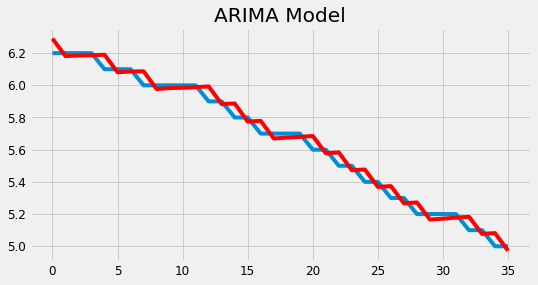

In [40]:
plt.figure(figsize=(8,4))
plt.title("ARIMA Model")
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

ERROR FOR ARIMA

In [41]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,predictions)
print("MSE:",error)

print("RMSE:",np.sqrt(error))

MSE: 0.0028555560690216057
RMSE: 0.05343740327730761


FOR LSTM

In [88]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,pred1)
print("MSE:",error)

print("RMSE:",np.sqrt(error))

MSE: 0.003347159743064926
RMSE: 0.057854643228222626


#HYBRID # ARIMA-LSTM


In [89]:
NEW_PREDICTION= (pred1+predictions)/2

In [90]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,NEW_PREDICTION)
print("MSE:",error)

print("RMSE:",np.sqrt(error))

MSE: 0.002453767482712619
RMSE: 0.04953551738614041


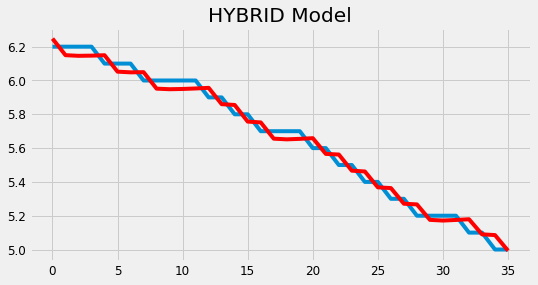

In [91]:
plt.figure(figsize=(8,4))
plt.title("HYBRID Model")
plt.plot(test)
plt.plot(NEW_PREDICTION, color='red')
plt.show()